In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
import scipy.stats as stats
import math

%matplotlib inline

In [2]:
rushing = pd.read_csv("2018_NFL_Rushing_Stats.csv")

In [3]:
rushing

,Rk,Player,Tm,Age,Pos,G,GS,Att,Yds,TD,Lng,Y/A,Y/G,Fmb
0,1,Ezekiel Elliott*,DAL,23,RB,15,15,304,1434,6,41,4.7,95.6,6
1,2,Saquon Barkley*,NYG,21,RB,16,16,261,1307,11,78,5.0,81.7,0
2,3,David Johnson,ARI,27,RB,16,16,258,940,7,53,3.6,58.8,3
3,4,Todd Gurley*+,LAR,24,RB,14,14,256,1251,17,36,4.9,89.4,1
4,5,Adrian Peterson,WAS,33,RB,16,16,251,1042,7,90,4.2,65.1,3
5,6,Jordan Howard,CHI,24,RB,16,15,250,935,9,42,3.7,58.4,2
6,7,Chris Carson,SEA,24,RB,14,14,247,1151,9,61,4.7,82.2,3
7,8,Joe Mixon,CIN,22,RB,14,13,237,1168,8,51,4.9,83.4,0
8,9,Peyton Barber,TAM,24,RB,16,16,234,871,5,28,3.7,54.4,1
9,10,Christian McCaffrey,CAR,22,RB,16,16,219,1098,7,59,5.0,68.6,4


The original data set had players seperated by the amount of play time they had for their position. If they played their position full-time: it was noted in all caps, part-time: noted in lowercase.

I changed it to all caps. In addition, some players didn't have info for their position. I entered the position registered on the roster at the beginning of the season. 

Number of players who scored touchdowns

Text(0, 0.5, '# of Players')

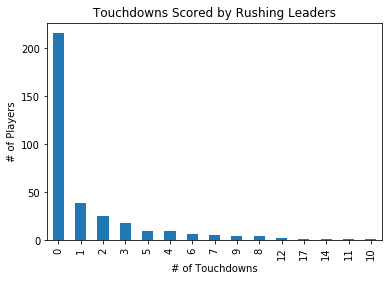

In [4]:
td_count = rushing["TD"].value_counts()
td_count.plot.bar()
plt.title("Touchdowns Scored by Rushing Leaders")
plt.xlabel("# of Touchdowns")
plt.ylabel("# of Players")

Top 10 teams who had the most players lead rushing yards

Note: Players who were traded in the season are noted by 2TM. 

Text(0, 0.5, '# of Players')

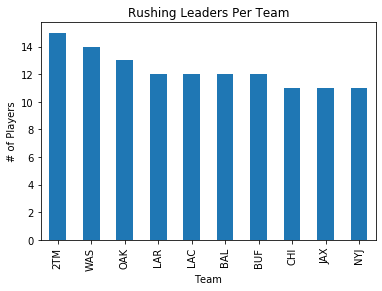

In [5]:
team_count = rushing["Tm"].value_counts()
team_count.head(10).plot.bar()
plt.title("Rushing Leaders Per Team")
plt.xlabel("Team")
plt.ylabel("# of Players")

Ages of the rushing leaders 

Text(0, 0.5, '# of Players')

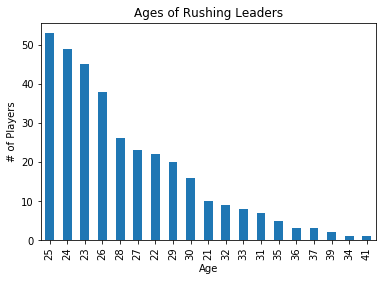

In [6]:
age_count = rushing["Age"].value_counts()
age_count.plot.bar()
plt.title("Ages of Rushing Leaders")
plt.xlabel("Age")
plt.ylabel("# of Players")

Distribution of the Total Rushing Yards

Text(0, 0.5, '# of Players')

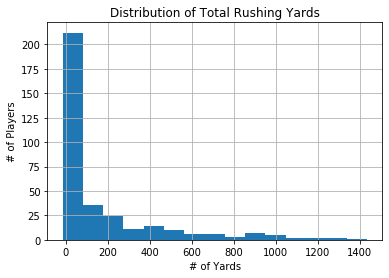

In [7]:
rushing["Yds"].hist(bins = 15)
plt.title("Distribution of Total Rushing Yards")
plt.xlabel("# of Yards")
plt.ylabel("# of Players")

Number of players per position that lead

Text(0, 0.5, '# of Players')

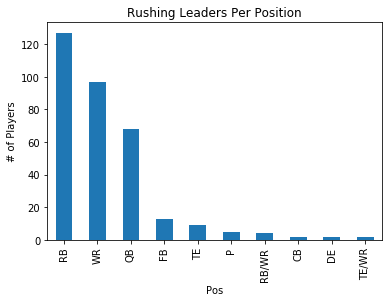

In [8]:
ps_count = rushing["Pos"].value_counts()
ps_count.head(10).plot.bar()
plt.title("Rushing Leaders Per Position")
plt.xlabel("Pos")
plt.ylabel("# of Players")

In [9]:
qb_filter = rushing["Pos"] == "QB"
qb_rushing = rushing[qb_filter]
len(qb_rushing["TD"])

68

In [10]:
rb_filter = rushing["Pos"] == "RB"
rb_rushing = rushing[rb_filter]
len(rb_rushing["TD"])

127

In [14]:
top_qb_rush = qb_rushing.sort_values('Yds', ascending=False).head(10)

Top 10 Quarterbacks that lead in rushing yards

In [15]:
top_qb_rush.drop(columns=['Rk'])

,Player,Tm,Age,Pos,G,GS,Att,Yds,TD,Lng,Y/A,Y/G,Fmb
29,Lamar Jackson,BAL,21,QB,16,7,147,695,5,39,4.7,43.4,12
55,Josh Allen,BUF,22,QB,12,11,89,631,8,45,7.1,52.6,8
50,Deshaun Watson*,HOU,23,QB,16,16,99,551,5,34,5.6,34.4,9
48,Cam Newton,CAR,29,QB,14,14,101,488,4,29,4.8,34.9,6
62,Mitchell Trubisky*,CHI,24,QB,14,14,68,421,3,39,6.2,30.1,6
64,Russell Wilson*,SEA,30,QB,16,16,67,376,0,40,5.6,23.5,10
71,Blake Bortles,JAX,26,QB,13,12,58,365,1,41,6.3,28.1,8
66,Marcus Mariota,TEN,25,QB,14,13,64,357,2,27,5.6,25.5,9
60,Dak Prescott*,DAL,25,QB,16,16,75,305,6,28,4.1,19.1,12
82,Jameis Winston,TAM,24,QB,11,9,49,281,1,18,5.7,25.5,7
